In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data_train = pd.read_csv(r"C:\Users\mourinho\Desktop\Master Program\Machine Learning\Dataset for the project\train.csv")
data_test = pd.read_csv(r"C:\Users\mourinho\Desktop\Master Program\Machine Learning\Dataset for the project\test.csv")

In [3]:
data_train.shape

(9557, 143)

In [4]:
data_test.shape

(23856, 142)

### Question: Identify the output Viarables?

In [5]:
#Looking for The label i.e output Viarables
#columns that is in train set but it's not the the test set
np.setdiff1d(data_train.columns, data_test.columns)

array(['Target'], dtype=object)

In [6]:
display(data_train["Target"])


0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

### Question: Understand the Data Type?

In [7]:
data_train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [8]:
data_train.select_dtypes(include = ["float64"])

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.00,1.000000,1.000000,0.0000,100.0000
1,135000.0,1.0,NaN,12.00,1.000000,1.000000,64.0000,144.0000
2,NaN,NaN,NaN,11.00,0.500000,0.250000,64.0000,121.0000
3,180000.0,1.0,1.0,11.00,1.333333,1.777778,1.0000,121.0000
4,180000.0,1.0,NaN,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...,...,...,...
9552,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9553,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9554,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625
9555,80000.0,NaN,NaN,8.25,1.250000,1.562500,0.0625,68.0625


In [9]:
data_train.select_dtypes(include = ['object']).head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [10]:
data_test.dtypes.value_counts()

int64      129
float64      8
object       5
dtype: int64

### Question: Check if there is any biases in your Dataset?

1     755
2    1597
3    1209
4    5996
Name: Target, dtype: int64

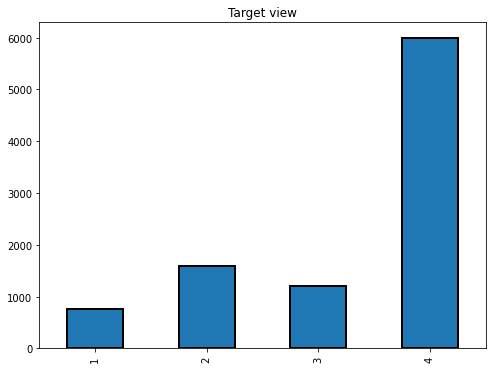

In [11]:
target_counts = data_train['Target'].value_counts().sort_index()
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target view")
target_counts

##### :: There's biases in the dataset

### Question: Check if there is a house without Family Head?

In [12]:
data_train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [13]:
family = np.where(data_train["parentesco1"] >= 1, 'Data Point with Family head', 'Data Point without Family head')
data_train.groupby(family)["idhogar"].count()


Data Point with Family head       2973
Data Point without Family head    6584
Name: idhogar, dtype: int64

In [14]:
# idhogar = Household level identifier
#Checking by Grouping household(since householding can repeat) with head family
Household_check = data_train.groupby(["idhogar", "parentesco1" ])["parentesco1"].sum()
Household_check

idhogar    parentesco1
001ff74ca  0              0
           1              1
003123ec2  0              0
           1              1
004616164  0              0
                         ..
ffae4a097  1              1
ffe90d46f  0              0
           1              1
fff7d6be1  0              0
           1              1
Name: parentesco1, Length: 5573, dtype: int64

In [15]:
#Since Household can repeat thus making have family head
House_with_head = data_train.groupby("idhogar")["parentesco1"].sum()
House_without_head = House_with_head[House_with_head != True]
print(len(House_without_head))


15


### Check whether all members of the house have the same poverty level?

In [16]:
data_train.groupby(['idhogar', 'Target'])['idhogar'].count()
#the count() is doing how many times household appears in The same Target 

idhogar    Target
001ff74ca  4         2
003123ec2  2         4
004616164  2         2
004983866  3         2
005905417  2         3
                    ..
ff9343a35  4         4
ff9d5ab17  4         3
ffae4a097  4         2
ffe90d46f  1         4
fff7d6be1  4         4
Name: idhogar, Length: 3074, dtype: int64

##### Since all members do not have the Same poverty level we're checking 
###### 1: All the household memebers that have the Same Poverty Level


In [17]:
same_Poverty_Level = data_train.groupby(['idhogar'])['Target'].apply(lambda x: x.nunique())
print(len(same_Poverty_Level))


2988


###### 2: All the household members that have different Poverty Level


In [18]:
Different_Poverty_Level = same_Poverty_Level[same_Poverty_Level != True]
print(len(Different_Poverty_Level))


85


In [19]:
data_train[data_train['idhogar'] == Different_Poverty_Level.index[0]][['idhogar', 'parentesco1', 'Target']]


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


### Question: Set poverty level of the members and the head of the house within a family

###### : Since we have 85 members with different poverty level, we're trying to fix that with this question!


In [20]:
for each_household in Different_Poverty_Level.index:
    
    Put_target = int(data_train[(data_train['idhogar'] == each_household) & (data_train['parentesco1'] == 1.0)]
                      ['Target'])
    

    data_train.loc[data_train['idhogar'] == each_household, 'Target'] = Put_target
    

###### NOW: WE HAVE REMOVED ALL.........the household members that have different Poverty Level


In [21]:
same_Poverty_Level = data_train.groupby(['idhogar'])['Target'].apply(lambda x: x.nunique())
Different_Poverty_Level = same_Poverty_Level[same_Poverty_Level != True]
print(len(Different_Poverty_Level))

0


### Question: Count how many null values are existing in columns?

In [22]:
data_train.shape

(9557, 143)

In [23]:
data_train.isnull().sum().sort_values(ascending = False).head(10)

rez_esc         7928
v18q1           7342
v2a1            6860
SQBmeaned          5
meaneduc           5
Id                 0
hogar_adul         0
parentesco10       0
parentesco11       0
parentesco12       0
dtype: int64

In [24]:
data_test.shape

(23856, 142)

In [25]:
data_test.isnull().sum().sort_values(ascending = False).head(10)

rez_esc        19653
v18q1          18126
v2a1           17403
meaneduc          31
SQBmeaned         31
instlevel1         0
edjefa             0
edjefe             0
dependency         0
parentesco8        0
dtype: int64

### Question: Remove null value rows of the target variable?

In [26]:
# Since Almost 3/4 of the 'rez_esc', 'v18q1', and 'v2a1' are missing we will drop all!
# Will remove the null for 'SQBmeaned' and 'meaneduc' by getting there mean avarage
data_train = data_train.drop(['v18q1', 'rez_esc', 'v2a1'], axis= 1)
data_train['SQBmeaned'] = data_train['SQBmeaned'].fillna(data_train['SQBmeaned'].mean())
data_train['meaneduc'] =data_train['meaneduc'].fillna(data_train['meaneduc'].mean())



In [27]:
# Since we droped for train data we're also droping for test data
# Will remove the null for 'SQBmeaned' and 'meaneduc' by getting there mean avarage
data_test = data_test.drop(['v18q1', 'rez_esc', 'v2a1'], axis= 1)
data_test['SQBmeaned'] = data_test['SQBmeaned'].fillna(data_test['SQBmeaned'].mean())
data_test['meaneduc'] =data_test['meaneduc'].fillna(data_test['meaneduc'].mean())


Feature engneering

In [28]:
#checking for object data types
data_train.select_dtypes(include = ['object']).head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [29]:
#callinf a function that is change yes = 1 and no = 2 since that's the reason why we have object columns is most
def map(i):
    
    if i=='yes':
        return(float(1))
    elif i=='no':
        return(float(0))
    else:
        return(float(i))

In [30]:
# Applyin the function in related column in our train data
data_train['dependency']= data_train['dependency'].apply(map)
data_train['edjefe']=data_train['edjefe'].apply(map)
data_train['edjefa']=data_train['edjefa'].apply(map)

In [31]:
# Apllying the function in related column in our test data 
data_test['dependency']= data_test['dependency'].apply(map)
data_test['edjefe']=data_test['edjefe'].apply(map)
data_test['edjefa']=data_test['edjefa'].apply(map)

In [32]:
#checking what remains for our object data type
data_test.select_dtypes(include = ['object']).head()

,Id,idhogar
0,ID_2f6873615,72958b30c
1,ID_1c78846d2,72958b30c
2,ID_e5442cf6a,72958b30c
3,ID_a8db26a79,5b598fbc9
4,ID_a62966799,1e2fc704e


In [33]:
#droping unneccesary columns like the squared ones and the 2 object data type column remained, thus applying for all the train and test data
cols_drop = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'idhogar', 'Id' ]


for data in [data_train, data_test]:
    data.drop(columns = cols_drop,inplace=True)

In [34]:
# Create correlation matrix
corr_matrix = data_train.corr()

# Select upper triangle of correlation matrix
higher = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in higher.columns if any(abs(higher[column]) > 0.95)]

to_drop

<ipython-input-34-53c52653506e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  higher = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

In [35]:
cols=['tamhog', 'hogar_total', 'hhsize', 'female', 'area2']
for df in [data_train, data_test]:
    df.drop(columns = cols,inplace=True)


In [36]:
print(data_train.shape)
print(data_test.shape)

(9557, 124)
(23856, 123)


### Question: Predict the accuracy using random forest classifier?

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
x = data_train.drop(['Target'], axis=1)
y = data_train['Target']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7645, 123), (1912, 123), (7645,), (1912,))

In [41]:
RFC = RandomForestClassifier (n_estimators = 10, random_state = 42)
RFC.fit(x_train, y_train)


Accuracy_on_Test = RFC.score(x_test, y_test)
print('Random Forest Accuracy on Testing:', Accuracy_on_Test)
Accuracy_on_Train = RFC.score(x_train, y_train)
print('Random Forest Accuracy on Training:', Accuracy_on_Train)

Random Forest Accuracy on Testing: 0.9341004184100419
Random Forest Accuracy on Training: 0.998168737737083


In [42]:
y_pred = RFC.predict(x_test)
prediction_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
prediction_df

,Actual,Predicted
8503,2,2
7752,1,1
9350,1,1
8414,3,3
7671,2,2
...,...,...
7415,4,4
3290,4,4
4161,4,4
4870,4,4


In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 150,    1,    1,   17],
       [   3,  266,    2,   31],
       [   6,    7,  203,   41],
       [   1,   14,    2, 1167]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.89      0.91       169
           2       0.92      0.88      0.90       302
           3       0.98      0.79      0.87       257
           4       0.93      0.99      0.96      1184

    accuracy                           0.93      1912
   macro avg       0.94      0.89      0.91      1912
weighted avg       0.94      0.93      0.93      1912



### Question: Check the accuracy using random forest with cross validation?

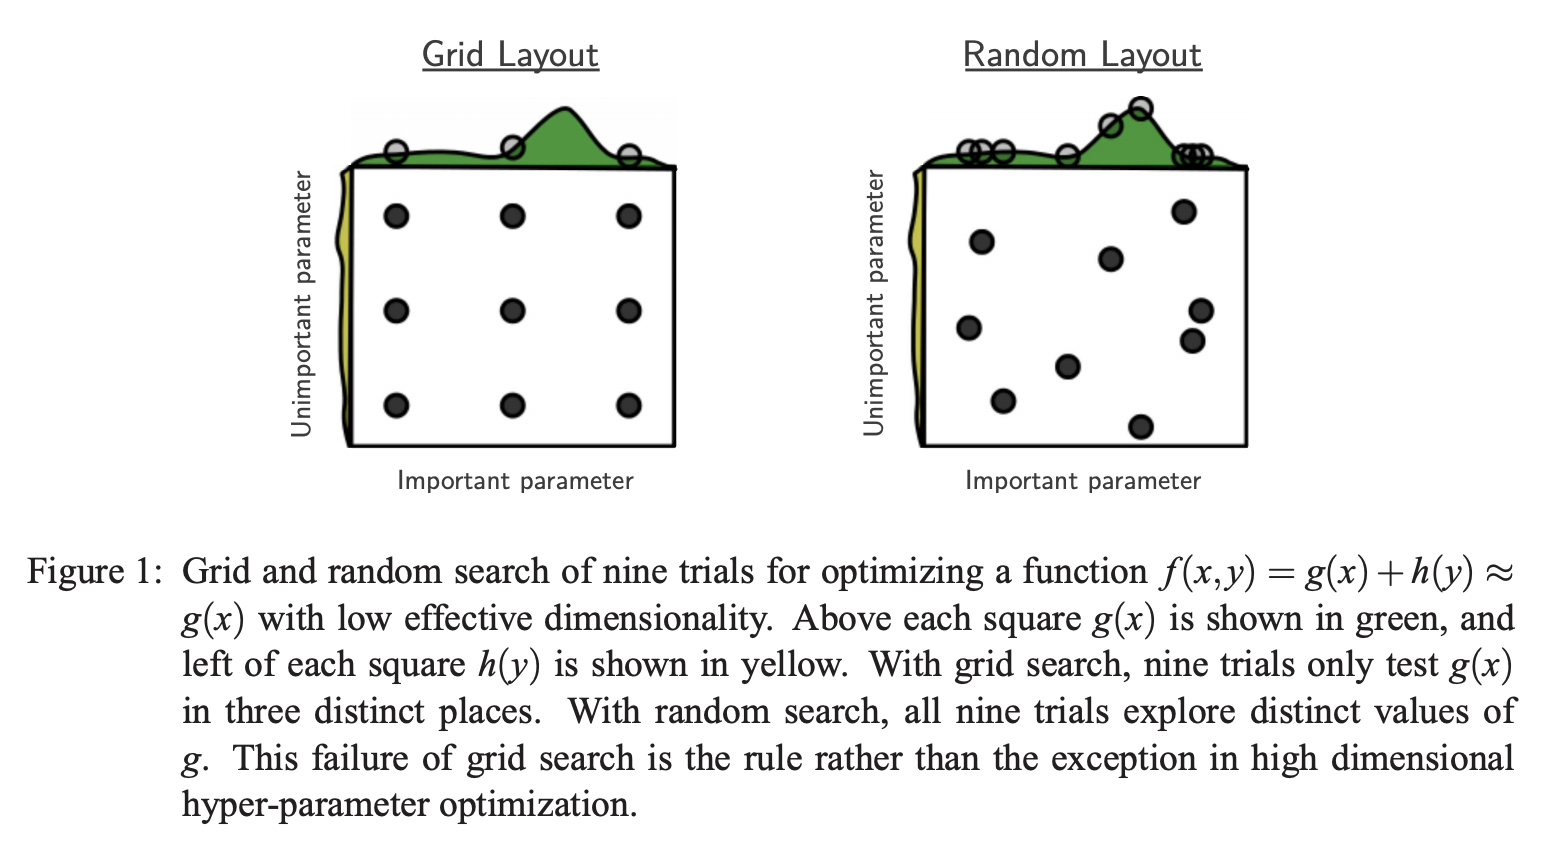

In [45]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
RFR_random = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
RFR_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=42, verbose=2)

In [47]:

RFR_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [53]:
best_random = RFR_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 0.0628 degrees.
Accuracy = 96.35%.
